In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pwd

'/home/tkd_010/ImageProcessing'

In [5]:
path = './data/images/binary_img.jpg'

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

ret, threshold = cv2.threshold(img, 120, 255, 0)
contours, hierarchy = cv2.findContours(threshold, 
                                       cv2.RETR_LIST,
                                       cv2.CHAIN_APPROX_SIMPLE)

In [11]:
cnt = contours[0]
M = cv2.moments(cnt)
print(M)

{'m00': 1821.5, 'm10': 78581.83333333333, 'm01': 558225.6666666666, 'm20': 3667084.25, 'm11': 24082347.041666664, 'm02': 171351889.0833333, 'm30': 182110324.95000002, 'm21': 1123807632.7666667, 'm12': 7392193226.066667, 'm03': 52682104034.8, 'mu20': 276963.7284365762, 'mu11': -220.23826134949923, 'mu02': 275361.5371107757, 'mu30': 10495.991693764925, 'mu21': -5673.149550139904, 'mu12': -10838.713889047503, 'mu03': 1222.0673751831055, 'nu20': 0.08347656037756726, 'nu11': -6.63795675512144e-05, 'nu02': 0.0829936616900764, 'nu30': 7.412258203278676e-05, 'nu21': -4.006372196009955e-05, 'nu12': -7.65428825413495e-05, 'nu03': 8.630226843682836e-06}


In [12]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx, cy)   ## Central moment

43 306


In [14]:
perimeter = cv2.arcLength(contours[0], True)
print(perimeter)  ## contour의 둘레

180.81118214130402


In [19]:
app_rate = 0.05
epsilon = app_rate * cv2.arcLength(contours[0], True)
approx = cv2.approxPolyDP(contours[0],   
                          epsilon,
                          True)

# plt.imshow(approx)
print(approx)

[[[ 28 281]]

 [[ 17 321]]

 [[ 58 332]]

 [[ 69 291]]]


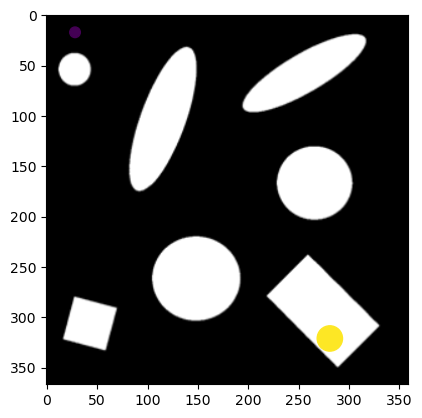

In [30]:
plt.figure()
plt.imshow(img, cmap='gray')
plt.scatter(*approx)
plt.show()

x:32.0, y:32.0, w: 22.0, h:28.0, angle:90.0


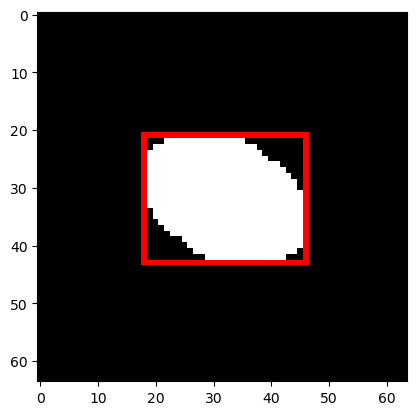

In [27]:
img = np.zeros((64,64,1), np.uint8)
img = cv2.ellipse(img, (32,32), (15, 10), 30, 0,360, (255), -1)
img_d = img.copy()

contours, hierarchy = cv2.findContours( img_d, 
                                      cv2.RETR_EXTERNAL,
                                      cv2.CHAIN_APPROX_SIMPLE)

x, y, w, h = cv2.boundingRect(contours[0])
(x,y) , (w,h), angle_of_rof = cv2.minAreaRect(contours[0])
print(f"x:{x}, y:{y}, w: {w}, h:{h}, angle:{angle_of_rof}")

rect = cv2.minAreaRect(contours[0])
box = cv2.boxPoints(rect)
box = np.int0(box)

img_c = cv2.cvtColor(img_d, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_c, [box], 0, (0,0,255), 1)

plt.imshow(img_c[...,::-1])
plt.show()

In [31]:
ellipse = cv2.fitEllipse(contours[0])
print(ellipse)

((32.0, 32.0), (20.10009765625, 30.23624038696289), 118.57588958740234)


In [57]:
cnt = contours[0]

###  aspect_ratio

x, y, w, h = cv2.boundingRect(cnt)
print(x, y, w, h)

aspect_ratio = float(w)/ h
print("aspect_ratio:    ", aspect_ratio)

###  extent
area = cv2.contourArea(cnt)      ###### contour
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area) / rect_area
print("extent:   ", extent)

### Solidity
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
print("solidity:    ", solidity)


### Equivalent Diameter - contour의 넓이와 동일한 넓이를 가진 원의 지름




18 21 29 23
aspect_ratio:     1.2608695652173914
extent:    0.704647676161919
solidity:     0.9771309771309772


In [54]:
mask = np.zeros(img_d.shape, np.uint8)
mask_d = mask.copy()
cv2.drawContours(mask, [cnt], 0, 255, -1)
pixelpoints = np.transpose(np.nonzero(mask))

cv2.drawContours(mask_d, [pixelpoints], 0, 255, -1)
print(pixelpoints)
plt.imshow(mask_d)
plt.show()

error: OpenCV(4.6.0) /croot/opencv-suite_1676452025216/work/modules/imgproc/src/drawing.cpp:2502: error: (-215:Assertion failed) npoints > 0 in function 'drawContours'


In [56]:
pixelpoints.shape

(507, 3)

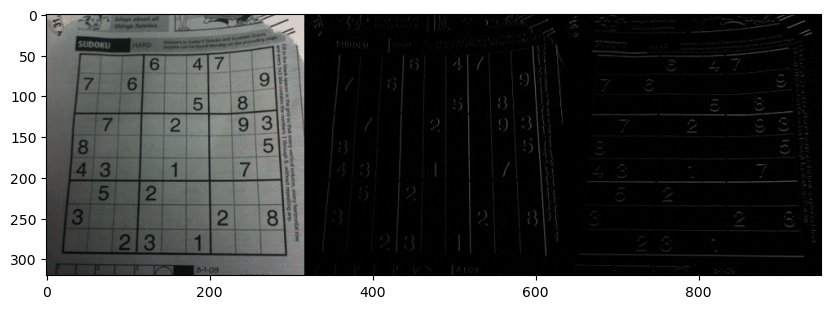

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = '../DIP/OpenCV_Python_Tutorial/images/sudoku.jpg'
img = cv2.imread(path)

gx_kernel = np.array([[-1,1]])
gy_kernel = np.array([[-1],[1]])

x_edge = cv2.filter2D(img, -1, gx_kernel)  # -1은 ddtype (원래 이미지의 type)  / => cv2.CV_32F / cv2.CV_64F 등 다른걸로도 해보기
y_edge = cv2.filter2D(img, -1, gy_kernel)

results = np.hstack((img, x_edge, y_edge))

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.imshow(results)
plt.show()

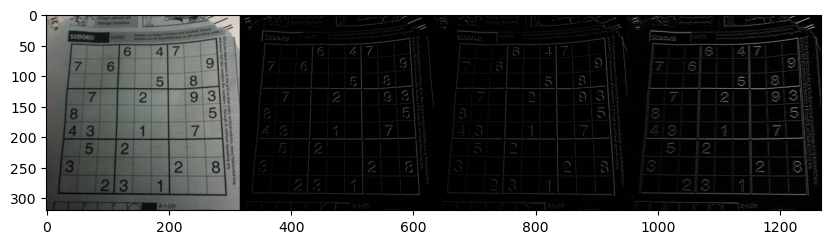

In [64]:
### diagonal edge 검출

gx_kernel = np.array([[1,0],[0,-1]])
gy_kernel = np.array([[0,1],[-1, 0]]) 

x_edge = cv2.filter2D(img, -1, gx_kernel)   ## filter2D : kernel을 넣어주면 convolution을 해주는 method / customized filter를 사용할 때
y_edge = cv2.filter2D(img, -1, gy_kernel)

results = np.hstack((img, np.abs(x_edge), np.abs(y_edge), np.abs(x_edge)+np.abs(y_edge)))
                       ### np.abs처리는 : input img의 ddtype이 signed일 때 의미를 갖음

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.imshow(results)
plt.show()

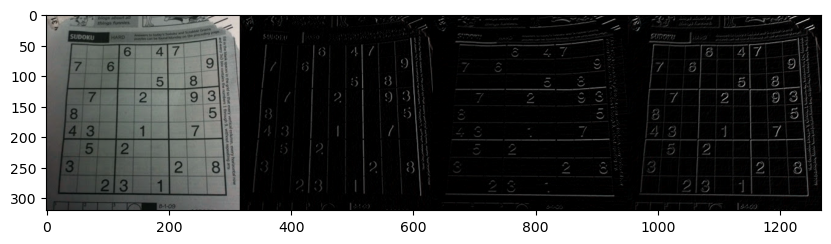

In [65]:
#### Prewitt Filter  -  centered difference

gx_kernel = np.array([[-1,0,1]])
gy_kernel = np.array([[-1],[0],[1]]) 

x_edge = cv2.filter2D(img, -1, gx_kernel)  
y_edge = cv2.filter2D(img, -1, gy_kernel)

results = np.hstack((img, np.abs(x_edge), np.abs(y_edge), np.abs(x_edge)+np.abs(y_edge)))
                       ### np.abs처리는 : input img의 ddtype이 signed일 때 의미를 갖음

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.imshow(results)
plt.show()

In [ ]:
### Sobel Filter
